# Ground-Cover Classification Activity

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

In [37]:
landsat_2016_completo = gdal.Open('../data/img/landsat_2016.img').ReadAsArray()
#satellite_2004_full = np.load('../data/rs/2004.npy')
#satellite_2010_full = np.load('../data/rs/2010.npy')

In [38]:
landsat_2016_completo.shape

(8, 7031, 8061)

In [39]:
scale_by = .25
import scipy.misc
def scale_image(img, size):
    return np.array([scipy.misc.imresize(chan, size) for chan in img])

In [40]:
landsat_2016 = scale_image(landsat_2016_completo, scale_by)

In [45]:
def show_image(img, ax=None):
    if len(img.shape) == 3:
        img = np.transpose(img, (1,2,0))
    if ax is None:
        plt.imshow(img, interpolation='nearest')
    else:
        ax.imshow(img, interpolation='nearest')

def show_rgb(red, green, blue, ax=None):
    show_image(np.array([red, green, blue]), ax=ax)


Cambia el codigo para mostrar el imagen en la manera mejor que encontraste en la actividad pasada.

<IPython.core.display.Javascript object>


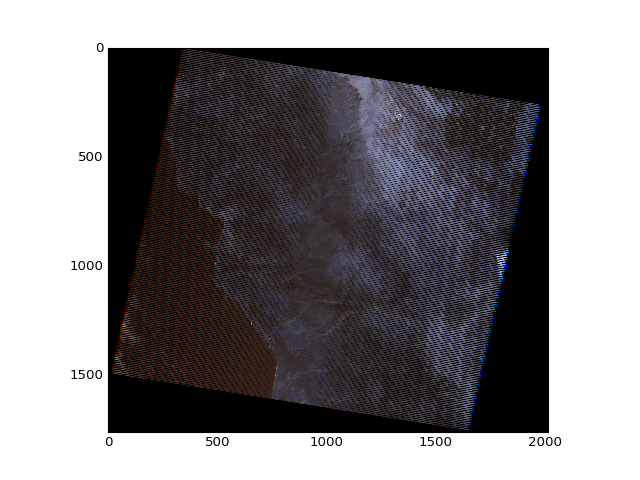

In [46]:
fig, axes = plt.subplots()
show_rgb(red=landsat_2016[0], green=landsat_2016[1], blue=landsat_2016[2])

# Define the Problem

We're going to try to identify ground cover.

* Input: a satellite image
* Output: which class we think each pixel is in. Specifically: is this pixel vegetation or not?

In [16]:
import sklearn.cluster
cluster = sklearn.cluster.MiniBatchKMeans(n_clusters=12)
np.reshape(satellite_2010, (4, -1)).shape
clustered_2010 = cluster.fit_predict(np.reshape(satellite_2010, (4, -1)).T).reshape(satellite_2010.shape[1:])

/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1279: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:630: DeprecationWarning: This function is deprecated. Please call randint(0, 3180565 + 1) instead
  0, n_samples - 1, init_size)
/Users/kcarnold/anaconda3/lib/python3.5/site-packages/sklearn/cluster/k_means_.py:1328: DeprecationWarning: This function is deprecated. Please call randin

In [17]:
def show_img_and_classes(red, green, blue, classes):
    fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(13,5))
    show_rgb(red=red, green=green, blue=blue, ax=axs[0])
    axs[1].imshow(classes)

<IPython.core.display.Javascript object>


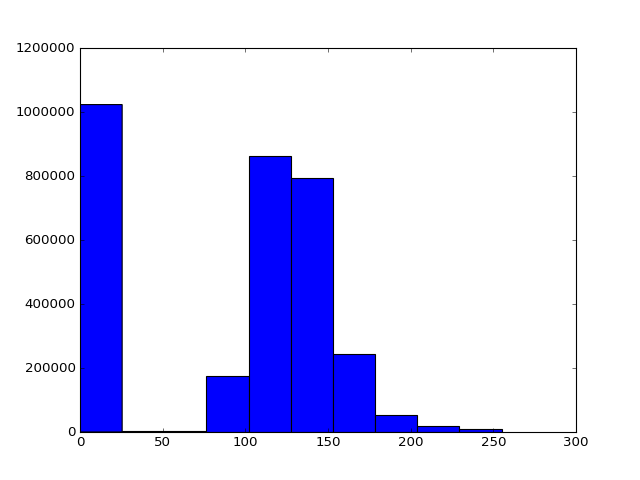

(array([ 1023192.,     1895.,     3531.,   173716.,   862925.,   792428.,
          243602.,    51687.,    19630.,     7960.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

In [25]:
plt.figure()
plt.hist(green.ravel())

<IPython.core.display.Javascript object>


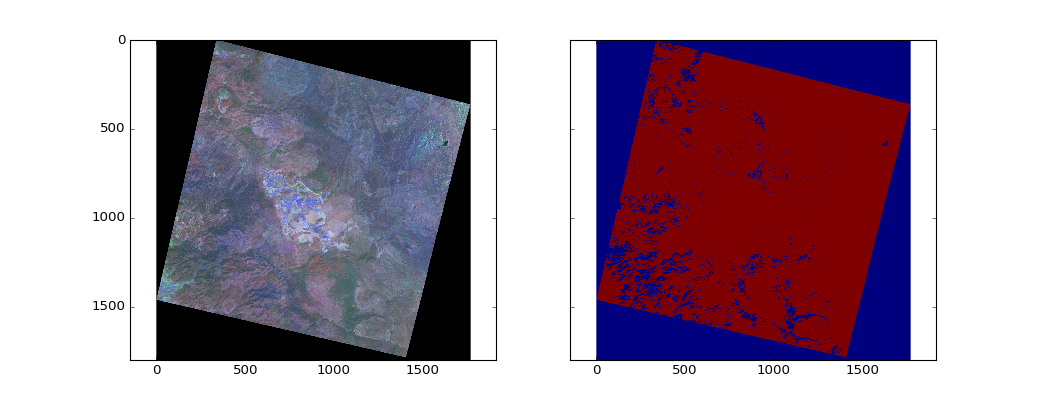

In [26]:
veg = green > 100
show_img_and_classes(red=MIR, green=NIR, blue=green, classes=veg)

In [28]:
# Adaptado de http://gis.stackexchange.com/questions/57005/python-gdal-write-new-raster-using-projection-from-old
from osgeo import gdalconst
from osgeo import osr

# Function to read the original file's projection:
def GetGeoInfo(FileName):
    SourceDS = gdal.Open(FileName, gdalconst.GA_ReadOnly)
    NDV = SourceDS.GetRasterBand(1).GetNoDataValue()
    xsize = SourceDS.RasterXSize
    ysize = SourceDS.RasterYSize
    GeoT = SourceDS.GetGeoTransform()
    Projection = osr.SpatialReference()
    Projection.ImportFromWkt(SourceDS.GetProjectionRef())
    DataType = SourceDS.GetRasterBand(1).DataType
    DataType = gdal.GetDataTypeName(DataType)
    return NDV, xsize, ysize, GeoT, Projection, DataType

# Function to write a new file.
def CreateGeoTiff(filename, Array, NDV, 
                  xsize, ysize, GeoT, Projection, DataType):
    if DataType == 'Float32':
        DataType = gdal.GDT_Float32
    # Set nans to the original No Data Value
    Array[np.isnan(Array)] = NDV
    # Set up the dataset
    DataSet = driver.Create(filename, xsize, ysize, 1, DataType )
            # the '1' is for band 1.
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection( Projection.ExportToWkt() )
    # Write the array
    DataSet.GetRasterBand(1).WriteArray( Array )
    DataSet.GetRasterBand(1).SetNoDataValue(NDV)
    return NewFileName

GetGeoInfo('../data/rs2/spot_2004_output.img')

(None,
 3734,
 3482,
 (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 <osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x13e0edb10> >,
 'Byte')

In [34]:
satellite_2004.shape

(4, 1801, 1766)

In [ ]:
CreateGeoTiff('test.tif', )